In [1]:
library( "data.table")   
library(ggplot2)


In [2]:
setwd("C:/_MCD/Labo1/code")
dataset  <- fread("./datasets/competencia2_2022.csv.gz")

## Filas y Columnas

In [3]:
nrow(dataset)
ncol(dataset)

[1] 4214386

[1] 155

### Filas: 4.214.386
### Columnas: 155

In [4]:
#convierto foto_mes a caracter para los graficos
dataset[, foto_mes:=as.character(foto_mes)]

In [5]:
mesCant <- dataset[ , .N, foto_mes ]
round(mean(mesCant[,N]))
min(mesCant[,foto_mes])
max(mesCant[,foto_mes])
nrow(mesCant)

[1] 145324

[1] "201901"

[1] "202105"

[1] 29

### Clientes Promedio x mes: 145.324
### Primer mes: 201901
### Último mes (a evaluar): 202105

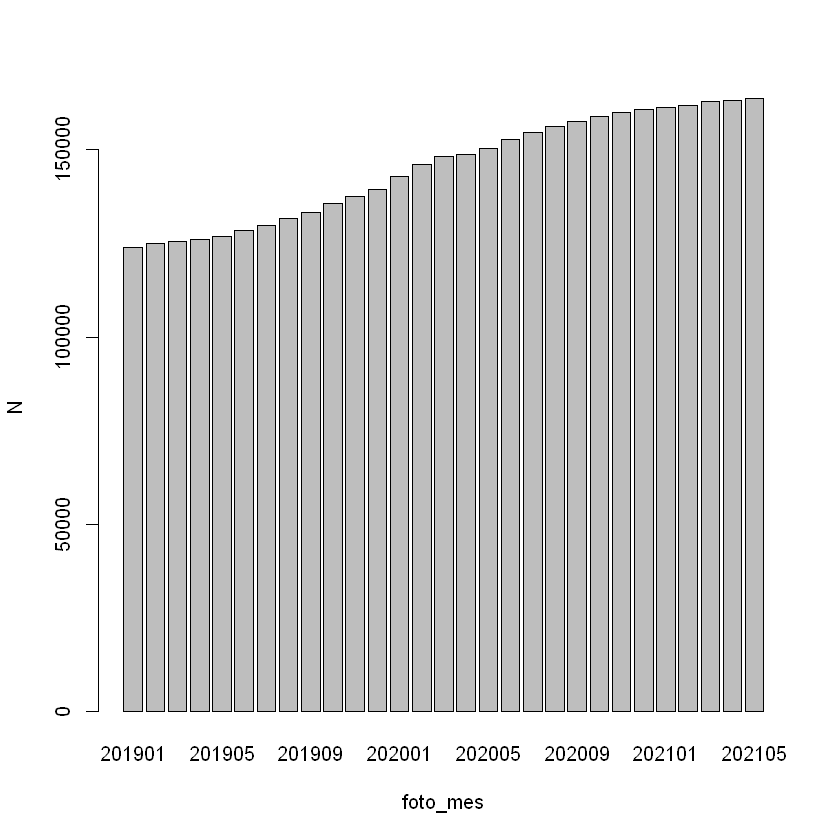

In [6]:
barplot(N ~ foto_mes,mesCant)

Se observa que mes a mes crece la cantidad de clientes

In [7]:
cantMesClase <- dataset[,.N,list(foto_mes,clase_ternaria)]

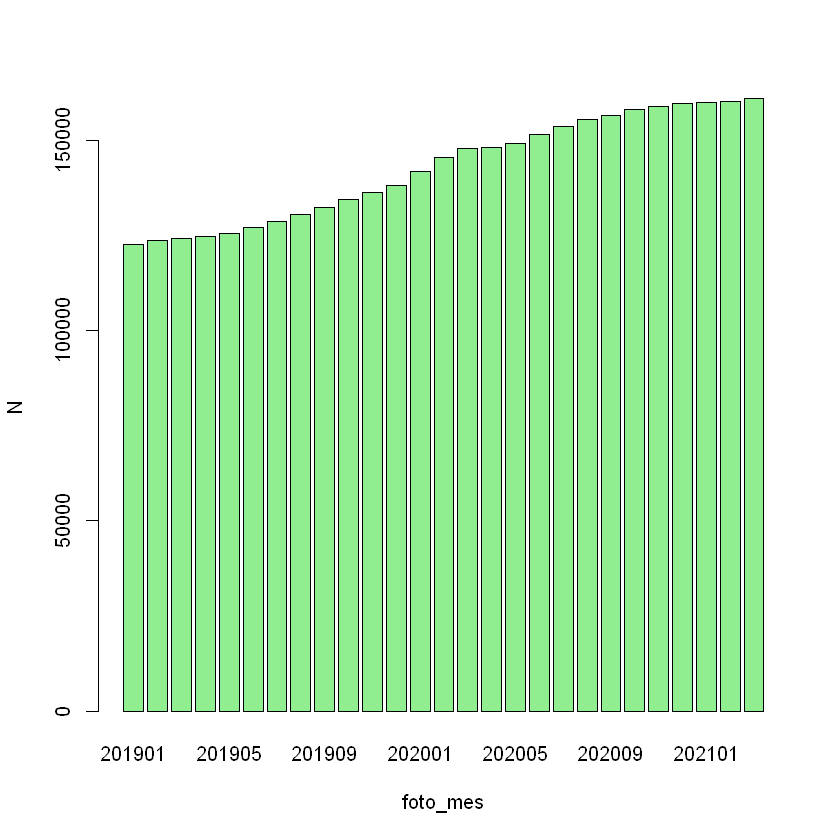

In [8]:
barplot(N ~ foto_mes,cantMesClase[clase_ternaria=="CONTINUA"],col="lightgreen")

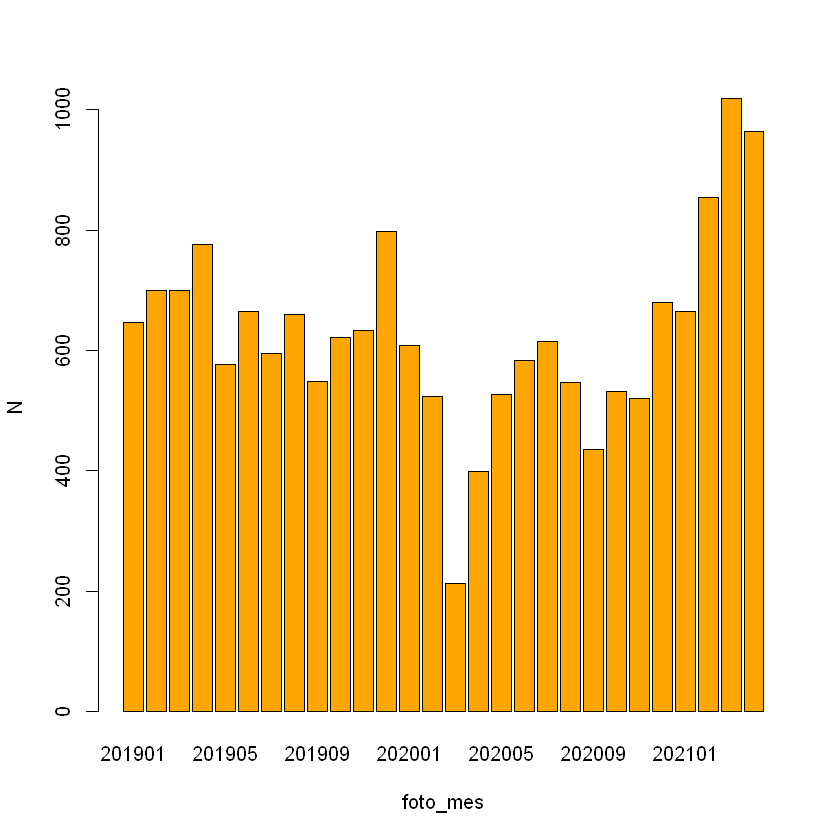

In [9]:
barplot(N ~ foto_mes,cantMesClase[clase_ternaria=="BAJA+1"],col="orange")

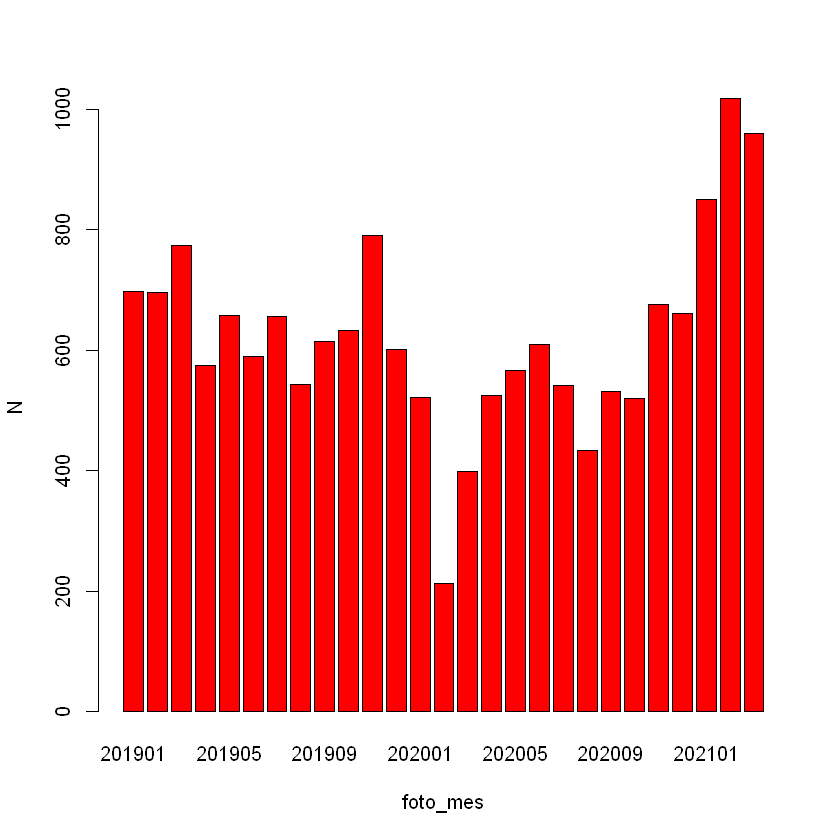

In [10]:
barplot(N ~ foto_mes,cantMesClase[clase_ternaria=="BAJA+2"],col="red")

In [11]:
#cantMesClase
cantMesClase[,clase_ternaria:=ifelse(clase_ternaria=="","NADA",clase_ternaria)]
cantMesClase[,clase_ternaria:=ifelse(clase_ternaria=="BAJA+1","BAJA_1",clase_ternaria)]
cantMesClase[,clase_ternaria:=ifelse(clase_ternaria=="BAJA+2","BAJA_2",clase_ternaria)]

aplanada <- dcast(cantMesClase, foto_mes ~ clase_ternaria, value.var="N")
aplanada[,TOTAL:=rowSums( cbind( BAJA_1,BAJA_2,CONTINUA,NADA) , na.rm=TRUE)]
aplanada[is.na(aplanada), ] <- 0   

In [12]:
aplanada[,prop_BAJA_1:=100*(BAJA_1/TOTAL)]
aplanada[,prop_BAJA_2:=100*(BAJA_2/TOTAL)]
aplanada[,prop_CONTINUA:=100*(CONTINUA/TOTAL)]
aplanada[,prop_NADA:=100*(NADA/TOTAL)]

aplanada

foto_mes,BAJA_1,BAJA_2,CONTINUA,NADA,TOTAL,prop_BAJA_1,prop_BAJA_2,prop_CONTINUA,prop_NADA
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
201901,647,697,122572,0,123916,0.5221279,0.5624778,98.91539,0.00000
201902,700,696,123624,0,125020,0.5599104,0.5567109,98.88338,0.00000
201903,700,774,124148,0,125622,0.5572272,0.6161341,98.82664,0.00000
201904,776,575,124765,0,126116,0.6153065,0.4559295,98.92876,0.00000
201905,576,658,125529,0,126763,0.4543913,0.5190789,99.02653,0.00000
201906,665,589,127116,0,128370,0.5180338,0.4588299,99.02314,0.00000
201907,595,656,128602,0,129853,0.4582104,0.5051866,99.03660,0.00000
201908,659,543,130573,0,131775,0.5000949,0.4120660,99.08784,0.00000
201909,548,615,132256,0,133419,0.4107361,0.4609538,99.12831,0.00000


### Mes 202105 sin datos sobre ternaria
### Mes 202104 solamente con datos BAJA+1